In [1]:
using GeometricIntegrators
using GeometricIntegrators.TestProblems.LotkaVolterra
using GeometricIntegrators.TestProblems.LotkaVolterra: ϑ₁, ϑ₂

┌ Info: Precompiling GeometricIntegrators [dcce2d33-59f6-5b8d-9047-0defad88ae06]
└ @ Base loading.jl:1273


In [2]:
using Plots

In [3]:
const Δt = 0.01
const nt = 100000
const nstages = 5
;

In [4]:
set_config(:nls_atol, 8eps())
set_config(:nls_rtol, 2eps())
set_config(:nls_rtol_break, 1E3)
set_config(:nls_stol_break, 1E3)
set_config(:nls_nmax, 1000)
;

In [5]:
function compute_energy_error(t, q::DataSeries{T}) where {T}
    h = SDataSeries(T, q.nt)
    e = SDataSeries(T, q.nt)

    for i in axes(q,2)
        h[i] = hamiltonian(t[i], q[:,i])
        e[i] = (h[i] - h[0]) / h[0]
    end

    (h, e)
end

compute_energy_error (generic function with 1 method)

In [6]:
function compute_momentum_error(t, q::DataSeries{T}, p::DataSeries{T}) where {T}
    p1_error = SDataSeries(T, q.nt)
    p2_error = SDataSeries(T, q.nt)

    for i in axes(q,2)
        p1_error[i] = p[1,i] - ϑ₁(t[i], q[:,i])
        p2_error[i] = p[2,i] - ϑ₂(t[i], q[:,i])
    end

    (p1_error, p2_error)
end

compute_momentum_error (generic function with 1 method)

In [7]:
ode = lotka_volterra_2d_iode();

In [8]:
int = IntegratorVPRK(ode, getTableauVPGLRK(nstages), Δt)
sol = Solution(ode, Δt, nt)
integrate!(int, sol)
H, ΔH = compute_energy_error(sol.t, sol.q)
Δϑ₁, Δϑ₂ = compute_momentum_error(sol.t, sol.q, sol.p);
;

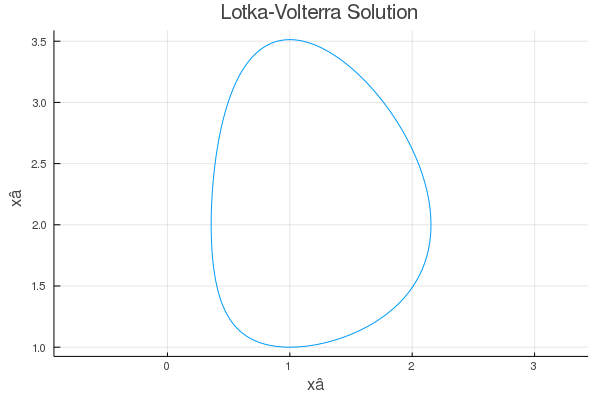

In [9]:
plot(sol.q[1,:], sol.q[2,:], legend=:none, xlab="x₁", ylab="x₂", title="Lotka-Volterra Solution", aspectratio=1, fmt=:png)

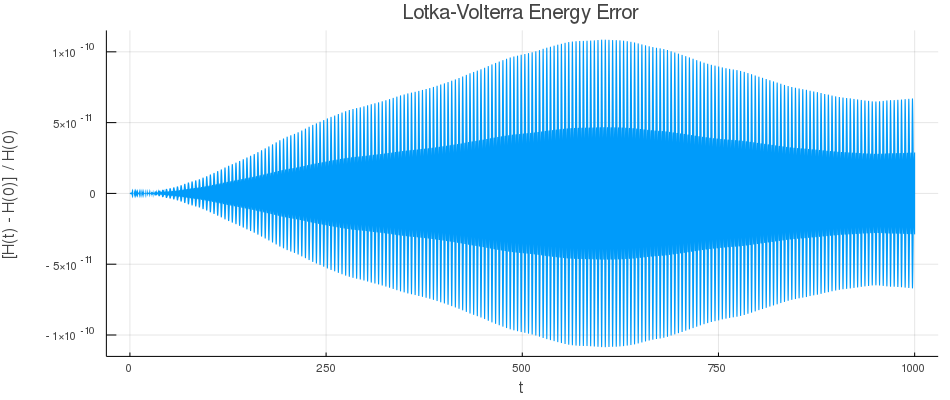

In [10]:
plot(sol.t, ΔH, legend=:none, xlab="t", ylab="[H(t) - H(0)] / H(0)", title="Lotka-Volterra Energy Error", size=(950, 400), fmt=:png)

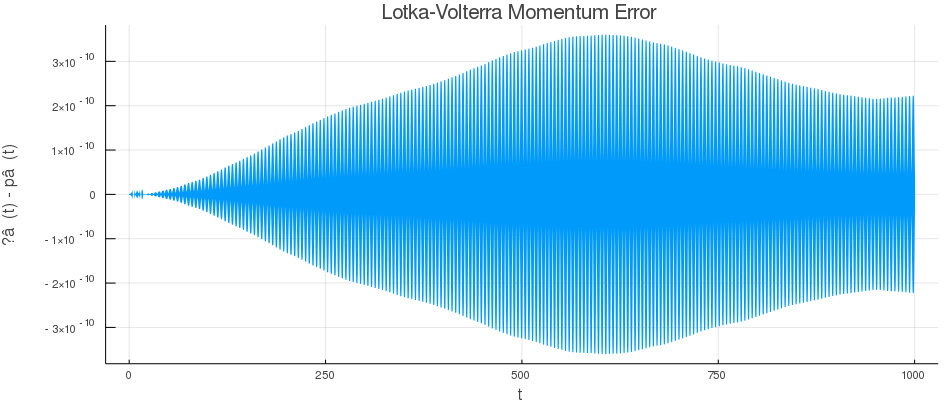

In [11]:
plot(sol.t, Δϑ₁, legend=:none, xlab="t", ylab="ϑ₁(t) - p₁(t)", title="Lotka-Volterra Momentum Error", size=(950, 400), fmt=:png)

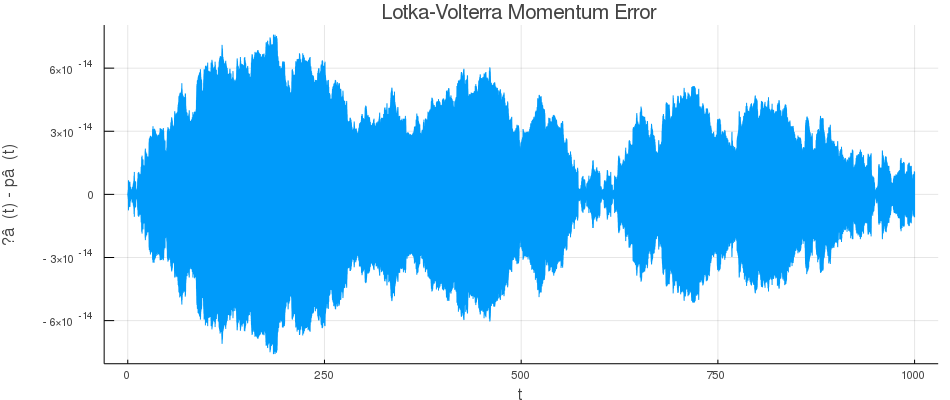

In [12]:
plot(sol.t, Δϑ₂, legend=:none, xlab="t", ylab="ϑ₂(t) - p₂(t)", title="Lotka-Volterra Momentum Error", size=(950, 400), fmt=:png)

In [13]:
int = IntegratorVPRKpTableau(ode, getCoefficientsPGLRK(nstages), Δt)
sol = Solution(ode, Δt, nt)
integrate!(int, sol)
;

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -6.539236884896319e-6]
[0.0, -6.539236884896319e-6]
[6.0554544523933395e-6, -6.539236884896319e-6]
[-6.0554544523933395e-6, -6.539236884896319e-6]
[0.0, -4.837824325029793e-7]
[0.0, -1.2594691337289658e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -6.35448007968344e-6]
[0.0, -6.35448007968344e-6]
[6.0554544523933395e-6, -6.35448007968344e-6]
[-6.0554544523933395e-6, -6.35448007968344e-6]
[0.0, -2.990256272901002e-7]
[0.0, -1.240993453207678e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -5.018183966668553e-6]
[0.0, -5.018183966668553e-6]
[6.0554

[6.0554544523933395e-6, -6.7761018042299775e-6]
[-6.0554544523933395e-6, -6.7761018042299775e-6]
[0.0, -7.20647351836638e-7]
[0.0, -1.2831556256623316e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -7.330286968686675e-6]
[0.0, -7.330286968686675e-6]
[6.0554544523933395e-6, -7.330286968686675e-6]
[-6.0554544523933395e-6, -7.330286968686675e-6]
[0.0, -1.2748325162933358e-6]
[0.0, -1.3385741421080016e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -7.336924087598353e-6]
[0.0, -7.336924087598353e-6]
[6.0554544523933395e-6, -7.336924087598353e-6]
[-6.0554544523933395e-6, -7.336924087598353e-6]
[0.0, -1.2814696352050137e-6]
[0.0, -1.3392378539991694e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -8.461045947179735e-6]
[0.

[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -1.4353669813080509e-5]
[0.0, -1.4353669813080509e-5]
[6.0554544523933395e-6, -1.4353669813080509e-5]
[-6.0554544523933395e-6, -1.4353669813080509e-5]
[0.0, -8.29821536068717e-6]
[0.0, -2.0409124265473847e-5]
[-1.3856625503674853e-5, 2.0233340302391366e-5]
[-1.3856625503674853e-5, 2.0233340302391366e-5]
[-7.801171051281512e-6, 2.0233340302391366e-5]
[-1.9912079956068193e-5, 2.0233340302391366e-5]
[-1.3856625503674853e-5, 2.6288794754784705e-5]
[-1.3856625503674853e-5, 1.4177885849998028e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[-0.00013235493303088305, 0.00019290947755481647]
[-0.00010955336282544685, 0.0001582882319198485]
[-5.6053466336298794e-5

[2.086222748272331e-6, 6.820022768906002e-5]
[8.14167720066567e-6, 7.425568214145336e-5]
[8.14167720066567e-6, 6.214477323666668e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.055454452393339

[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -4.770995122996209e-6]
[0.0, -4.770995122996209e-6]
[6.0554544523933395e-6, -4.770995122996209e-6]
[-6.0554544523933395e-6, -4.770995122996209e-6]
[0.0, 1.2844593293971309e-6]
[0.0, -1.0826449575389548e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -5.5262932598583156e-6]
[0.0, -5.5262932598583156e-6]
[6.0554544523933395e-6, -5.5262932598583156e-6]
[-6.0554544523933395e-6, -5.5262932598583156e-6]
[0.0, 5.291611925350239e-7]
[0.0, -1.1581747712251655e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -5.5554873489185105e-6]
[0.0, -5.5554873489185105e-6]
[6.0554544523933395e-6, -5.5554873489185105e-6]
[-6.0554544523933395e-6, -5.5554873489185105e-6]
[0.0, 4.99967103474829e-7]
[0.0, -1.1610

[0.0001278985379793381, 7.339944790779803e-5]
[0.00011578762907455141, 7.339944790779803e-5]
[0.00012184308352694475, 7.945490236019137e-5]
[0.00012184308352694475, 6.734399345540469e-5]
[0.0002781128758467729, 0.0001812256046084794]
[0.0002781128758467729, 0.0001812256046084794]
[0.0002841683302991662, 0.0001812256046084794]
[0.00027205742139437954, 0.0001812256046084794]
[0.0002781128758467729, 0.00018728105906087275]
[0.0002781128758467729, 0.00017517015015608607]
[0.00024388392204075608, 0.00016200735479712778]
[0.00024388392204075608, 0.00016200735479712778]
[0.0002499393764931494, 0.00016200735479712778]
[0.00023782846758836274, 0.00016200735479712778]
[0.00024388392204075608, 0.00016806280924952112]
[0.00024388392204075608, 0.00015595190034473443]
[0.0002836228418845874, 0.00018622917260670114]
[0.0002792553066569018, 0.00018340571774039336]
[0.0002621090425261902, 0.00017232127299637005]
[0.0002621090425261902, 0.00017232127299637005]
[0.00026816449697858355, 0.0001723212729963

[-7.240958915608375e-5, -0.00012110908904786681]
[-8.452049806087043e-5, -0.00012110908904786681]
[-7.846504360847709e-5, -0.00011505363459547347]
[-7.846504360847709e-5, -0.00012716454350026016]
[-5.931031871998689e-5, -8.881333196843567e-5]
[-5.931031871998689e-5, -8.881333196843567e-5]
[-5.325486426759355e-5, -8.881333196843567e-5]
[-6.536577317238023e-5, -8.881333196843567e-5]
[-5.931031871998689e-5, -8.275787751604233e-5]
[-5.931031871998689e-5, -9.486878642082901e-5]
[9.370067671122035e-5, 0.00012475220798670495]
[6.584654630049865e-5, 8.547789935725388e-5]
[6.584654630049865e-5, 8.547789935725388e-5]
[7.190200075289199e-5, 8.547789935725388e-5]
[5.9791091848105304e-5, 8.547789935725388e-5]
[6.584654630049865e-5, 9.153335380964722e-5]
[6.584654630049865e-5, 7.942244490486054e-5]
[2.9955823560765855e-5, 3.703426373810716e-5]
[2.9955823560765855e-5, 3.703426373810716e-5]
[3.60112780131592e-5, 3.703426373810716e-5]
[2.3900369108372517e-5, 3.703426373810716e-5]
[2.9955823560765855e-5

[-0.00010312647268525677, -0.0002499877345708156]
[-5.0921025967129464e-5, -0.00012645934505573544]
[-2.48068542669271e-5, -6.466806126376724e-5]
[-2.48068542669271e-5, -6.466806126376724e-5]
[-1.8751399814533762e-5, -6.466806126376724e-5]
[-3.086230871932044e-5, -6.466806126376724e-5]
[-2.48068542669271e-5, -5.8612606811373895e-5]
[-2.48068542669271e-5, -7.072351571616058e-5]
[-4.9184043382742205e-5, -0.00012992970041797788]
[-4.9184043382742205e-5, -0.00012992970041797788]
[-4.312858893034886e-5, -0.00012992970041797788]
[-5.5239497835135547e-5, -0.00012992970041797788]
[-4.9184043382742205e-5, -0.00012387424596558454]
[-4.9184043382742205e-5, -0.00013598515487037123]
[-9.879045770778736e-5, -0.00025834470696205924]
[-9.879045770778736e-5, -0.00025834470696205924]
[-9.273500325539401e-5, -0.00025834470696205924]
[-0.0001048459121601807, -0.00025834470696205924]
[-9.879045770778736e-5, -0.0002522892525096659]
[-9.879045770778736e-5, -0.0002644001614144526]
[0.0, 0.0]
[6.05545445239333

[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[-1.061650889132243e-6, -5.004925620194861e-7]
[-1.061650889132243e-6, -5.004925620194861e-7]
[4.993803563261097e-6, -5.004925620194861e-7]
[-7.117105341525582e-6, -5.004925620194861e-7]
[-1.061650889132243e-6, 5.554961890373853e-6]
[-1.061650889132243e-6, -6.555947014412826e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[-0.0001089981801430801, 0.0002002564373833741]
[-6.69729574854881e-5, 0.00012153309819883545]
[-3.399760421830198e-5, 5.976233874008185e-5]
[-3.399760421830198e-5, 5.976233874008185e-5]
[-2.794214976590864e-5, 5.976233874008185e-5]
[-4.0053058

[-2.8481501582469837e-5, -1.2422798633469646e-5]
[-4.059241048725652e-5, -1.2422798633469646e-5]
[-3.4536956034863176e-5, -6.367344181076307e-6]
[-3.4536956034863176e-5, -1.8478253085862985e-5]
[1.1852312554194136e-5, -2.257714461212442e-6]
[1.1852312554194136e-5, -2.257714461212442e-6]
[1.7907767006587475e-5, -2.257714461212442e-6]
[5.796858101800797e-6, -2.257714461212442e-6]
[1.1852312554194136e-5, 3.7977399911808974e-6]
[1.1852312554194136e-5, -8.313168913605782e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.00015744181576222684, 3.380747336825559e-5]
[0.00015744181576222684, 3.380747336825559e-5]
[0.00016349727021462018, 3.380747336825559e-5]
[0.0001513863613098335, 3.380747336825559e-5]
[0.00015744181576222684, 3.986292782064893e-5]
[0.00015744181576222684, 2.775201891586225e-5]
[6.046302632062268e-5, 9.40261915206077e-6]
[6.046302632062268e-5, 9.40261915206077e-6]
[6.651848077301602e-5, 9.40

[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[8.577691935145816e-5, 3.783356224128713e-5]
[8.577691935145816e-5, 3.783356224128713e-5]
[9.18323738038515e-5, 3.783356224128713e-5]
[7.972146489906482e-5, 3.783356224128713e-5]
[8.577691935145816e-5, 4.3889016693680475e-5]
[8.577691935145816e-5, 3.177810778889379e-5]
[0.00020669201214684556, 9.858210301769995e-5]
[0.00020669201214684556, 9.858210301769995e-5]
[0.0002127474665992389, 9.858210301769995e-5]
[0.00020063655769445222, 9.858210301769995e-5]
[0.00020669201214684556, 0.00010463755747009329]
[0.00020669201214684556, 9.25266485653066e-5]
[0.00011586019536094547, 5.255232553077875e-5]
[0.00011586019536094547, 5.255232553077875e-5]
[0.00012191564981333881, 5.255232553077875e-5]
[0.00010980474090855213, 5.255232553077875e-5]
[0.00011586019536094547, 5.8607779983172095e-5]
[0.00011586019536094547, 4.649687107838541e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[4.84174498701634e-5, 2.427418930754001e-5]
[4.84174498701634e-5, 2.427418930754001e-5]
[5.447290432255674e-5, 2.427418930754001e-5]
[4.236199541777006e-5, 2.427418930754001e-5]
[4.84174498701634e-5, 3.0329643759933348e-5]
[4.84174498701634e-5, 1.821873485514667e-5]
[0.0001372294371059935, 7.829075704952719e-5]
[0.0001372294371059935, 7.829075704952719e-5]
[0.00014328489155838683, 7.829075704952719e-5]
[0.00013117398265360015, 7.829075704952719e-5]
[0.0001372294371059935, 8.434621150192053e-5]
[0.0001372294371059935, 7.223530259713385e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[8.573466071887866e-5, 4.621311351526376e-5]
[8.573466071887866e-5, 4.621311351526376e-5]
[9.1790115171272e-5, 4.621311351526376e-5]
[7.967920626648532e-5, 4.621311351526376e-5]
[8.573466071887866e

[0.00030747531304414197, 0.00017265887709949382]
[0.0002953644041393553, 0.00017265887709949382]
[0.0003014198585917486, 0.00017871433155188717]
[0.0003014198585917486, 0.00016660342264710048]
[0.00023480985961542192, 0.00013298577741275376]
[0.00023480985961542192, 0.00013298577741275376]
[0.00024086531406781526, 0.00013298577741275376]
[0.00022875440516302857, 0.00013298577741275376]
[0.00023480985961542192, 0.0001390412318651471]
[0.00023480985961542192, 0.00012693032296036042]
[0.00018572114121955975, 0.00010335358792750251]
[0.00018572114121955975, 0.00010335358792750251]
[0.0001917765956719531, 0.00010335358792750251]
[0.0001796656867671664, 0.00010335358792750251]
[0.00018572114121955975, 0.00010940904237989585]
[0.00018572114121955975, 9.729813347510917e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.00021946093531650655, 0.00012110908904786681]
[0.00021946093531650655, 0.0001211090890478668

[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[2.2750852608030714e-6, -5.255126517911319e-6]
[2.2750852608030714e-6, -5.255126517911319e-6]
[8.330539713196411e-6, -5.255126517911319e-6]
[-3.780369191590268e-6, -5.255126517911319e-6]
[2.2750852608030714e-6, 8.003279344820207e-7]
[2.2750852608030714e-6, -1.1310580970304659e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[-2.525535270516785e-5, -1.7132828461585532e-5]
[-2.525535270516785e-5, -1.7132828461585532e-5]
[-1.919989825277451e-5, -1.7132828461585532e-5]
[-3.131080715756119e-5, -1.7132828461585532e-5]
[-2.525535270516785e-5, -1.1077374009192194e-5]
[-2.525535270516785e-5, -2.318828291397887e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[2.264075865701288e-6, -5.511006370776779e-6]
[2.264075865701288e-6, -5.511006370776779e-6]
[8.319530318094627e-6, 

[9.663496063611037e-5, -5.222661242758354e-6]
[0.00010269041508850371, 8.327932096349852e-7]
[0.00010269041508850371, -1.1278115695151694e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -6.11240229990801e-6]
[0.0, -6.11240229990801e-6]
[6.0554544523933395e-6, -6.11240229990801e-6]
[-6.0554544523933395e-6, -6.11240229990801e-6]
[0.0, -5.694784751467063e-8]
[0.0, -1.216785675230135e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -6.136343405840406e-6]
[0.0, -6.136343405840406e-6]
[6.0554544523933395e-6, -6.136343405840406e-6]
[-6.0554544523933395e-6, -6.136343405840406e-6]
[0.0, -8.088895344706695e-8]
[0.0, -1.2191797858233746e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.00010222690519631438, -1.8882183851552394e-5]
[0.

[-6.914377503027143e-5, 0.00010501010555709594]
[-5.137374828291292e-5, 8.323575393182383e-5]
[-5.137374828291292e-5, 8.323575393182383e-5]
[-4.5318293830519576e-5, 8.323575393182383e-5]
[-5.742920273530626e-5, 8.323575393182383e-5]
[-5.137374828291292e-5, 8.929120838421717e-5]
[-5.137374828291292e-5, 7.718029947943049e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[-1.947464055368475e-5, 3.846334957723917e-5]
[-1.947464055368475e-5, 3.846334957723917e-5]
[-1.3419186101291412e-5, 3.846334957723917e-5]
[-2.553009500607809e-5, 3.846334957723917e-5]
[-1.947464055368475e-5, 4.4518804029632515e-5]
[-1.947464055368475e-5, 3.240789512484583e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[7.131979688374379e-6, -2.476008042756388e-5]
[7.131979688374379e-6, -2.476008042756388e-5]
[1.318743414076772e-5, -2.476008042756388e-5]
[

[4.190854121012816e-5, 3.075691221859191e-5]
[4.79639956625215e-5, 3.075691221859191e-5]
[3.5853086757734816e-5, 3.075691221859191e-5]
[4.190854121012816e-5, 3.6812366670985254e-5]
[4.190854121012816e-5, 2.4701457766198573e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[-0.0005623498701455941, -0.0004896844167168741]
[-0.0005623498701455941, -0.0004896844167168741]
[-0.0005562944156932008, -0.0004896844167168741]
[-0.0005684053245979874, -0.0004896844167168741]
[-0.0005623498701455941, -0.00048362896226448077]
[-0.0005623498701455941, -0.0004957398711692674]
[-0.0005098008416773672, -0.00044514090430435363]
[-0.0005098008416773672, -0.00044514090430435363]
[-0.0005037453872249739, -0.00044514090430435363]
[-0.0005158562961297604, -0.00044514090430435363]
[-0.0005098008416773672, -0.0004390854498519603]
[-0.0005098008416773672, -0.000451196358756747]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.05545445

[-3.159846232430707e-5, -2.658895000459985e-5]
[-2.5543007871913732e-5, -2.658895000459985e-5]
[-3.765391677670041e-5, -2.658895000459985e-5]
[-3.159846232430707e-5, -2.053349555220651e-5]
[-3.159846232430707e-5, -3.264440445699319e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[-9.261829185423068e-5, -6.41274946605946e-5]
[-9.261829185423068e-5, -6.41274946605946e-5]
[-8.656283740183734e-5, -6.41274946605946e-5]
[-9.867374630662403e-5, -6.41274946605946e-5]
[-9.261829185423068e-5, -5.807204020820125e-5]
[-9.261829185423068e-5, -7.018294911298794e-5]
[-0.00028680688249850257, -0.00018523658370846142]
[-0.00028680688249850257, -0.00018523658370846142]
[-0.00028075142804610923, -0.00018523658370846142]
[-0.0002928623369508959, -0.00018523658370846142]
[-0.00028680688249850257, -0.00017918112925606808]
[-0.00028680688249850257, -0.00019129203816085476]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.05545445

[7.926600682764921e-7, 1.0678541655876054e-6]
[7.926598786683679e-7, 1.0678542619932408e-6]
[7.926597838643057e-7, 1.0678543101960585e-6]
[7.926597364622746e-7, 1.0678543342974675e-6]
[7.926597127612591e-7, 1.0678543463481718e-6]
[7.926597009107513e-7, 1.0678543523735241e-6]
[7.926596949854975e-7, 1.0678543553862001e-6]
[7.926596920228705e-7, 1.0678543568925383e-6]
[7.92659690541557e-7, 1.0678543576457073e-6]
[7.926596898009003e-7, 1.0678543580222918e-6]
[7.92659689430572e-7, 1.067854358210584e-6]
[7.926596892454077e-7, 1.06785435830473e-6]
[7.926596891528256e-7, 1.0678543583518033e-6]
[7.926596891065347e-7, 1.0678543583753398e-6]
[7.926596890833891e-7, 1.067854358387108e-6]
[7.926596890718164e-7, 1.0678543583929922e-6]
[7.9265968906603e-7, 1.0678543583959341e-6]
[7.926596890631367e-7, 1.0678543583974052e-6]
[7.926596890616902e-7, 1.0678543583981409e-6]
[7.926596890609668e-7, 1.0678543583985085e-6]
[7.926596890606052e-7, 1.0678543583986925e-6]
[7.926596890604244e-7, 1.0678543583987844e

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 2.3141864149273906e-7]
[0.0, 2.3141864149273906e-7]
[6.0554544523933395e-6, 2.3141864149273906e-7]
[-6.0554544523933395e-6, 2.3141864149273906e-7]
[0.0, 6.286873093886078e-6]
[0.0, -5.824035810900601e-6]
[0.0, 1.466298243047301e-7]
[0.0, 1.735639811195543e-7]
[0.0, 1.735639811195543e-7]
[6.0554544523933395e-6, 1.735639811195543e-7]
[-6.0554544523933395e-6, 1.735639811195543e-7]
[0.0, 6.229018433512894e-6]
[0.0, -5.881890471273785e-6]
[0.0, 1.820791313201777e-7]
[0.0, 1.8079581366620238e-7]
[0.0, 1.7717989739287834e-7]
[0.0, 1.7537193925621633e-7]
[0.0, 1.744679601878853e-7]
[0.0, 1.740159706537198e-7]
[0.0, 1.7378997588663704e-7]
[0.0, 1.7367697850309567e-7]
[0.0, 1.7362047981132498e-7]
[0.0, 1.7359223046543965e-7]
[0.0, 1.7357810579249697e-7]
[0.0, 1.7357104345602563e-7]
[0.0, 1.7356751228778997e-7]
[0.0, 1.7356574670367213e-7]
[0.0, 1.735648639116132e

[0.0, 9.01031802225559e-111]
[0.0, 4.505159011127795e-111]
[0.0, 2.2525795055638977e-111]
[0.0, 1.1262897527819488e-111]
[0.0, 5.631448763909744e-112]
[0.0, 2.815724381954872e-112]
[0.0, 1.407862190977436e-112]
[0.0, 7.03931095488718e-113]
[0.0, 3.51965547744359e-113]
[0.0, 1.759827738721795e-113]
[0.0, 8.799138693608975e-114]
[0.0, 4.399569346804488e-114]
[0.0, 2.199784673402244e-114]
[0.0, 1.099892336701122e-114]
[0.0, 5.49946168350561e-115]
[0.0, 2.749730841752805e-115]
[0.0, 1.3748654208764024e-115]
[0.0, 6.874327104382012e-116]
[0.0, 3.437163552191006e-116]
[0.0, 1.718581776095503e-116]
[0.0, 8.592908880477515e-117]
[0.0, 4.2964544402387575e-117]
[0.0, 2.1482272201193787e-117]
[0.0, 1.0741136100596894e-117]
[0.0, 5.370568050298447e-118]
[0.0, 2.6852840251492234e-118]
[0.0, 1.3426420125746117e-118]
[0.0, 6.713210062873059e-119]
[0.0, 3.356605031436529e-119]
[0.0, 1.6783025157182646e-119]
[0.0, 8.391512578591323e-120]
[0.0, 4.1957562892956616e-120]
[0.0, 2.0978781446478308e-120]
[0.

[0.0, 7.857269203858631e-216]
[0.0, 3.9286346019293155e-216]
[0.0, 1.9643173009646578e-216]
[0.0, 9.821586504823289e-217]
[0.0, 4.9107932524116444e-217]
[0.0, 2.4553966262058222e-217]
[0.0, 1.2276983131029111e-217]
[0.0, 6.138491565514556e-218]
[0.0, 3.069245782757278e-218]
[0.0, 1.534622891378639e-218]
[0.0, 7.673114456893194e-219]
[0.0, 3.836557228446597e-219]
[0.0, 1.9182786142232986e-219]
[0.0, 9.591393071116493e-220]
[0.0, 4.7956965355582465e-220]
[0.0, 2.3978482677791233e-220]
[0.0, 1.1989241338895616e-220]
[0.0, 5.994620669447808e-221]
[0.0, 2.997310334723904e-221]
[0.0, 1.498655167361952e-221]
[0.0, 7.49327583680976e-222]
[0.0, 3.74663791840488e-222]
[0.0, 1.87331895920244e-222]
[0.0, 9.3665947960122e-223]
[0.0, 4.6832973980061e-223]
[0.0, 2.34164869900305e-223]
[0.0, 1.170824349501525e-223]
[0.0, 5.854121747507625e-224]
[0.0, 2.9270608737538126e-224]
[0.0, 1.4635304368769063e-224]
[0.0, 7.317652184384531e-225]
[0.0, 3.658826092192266e-225]
[0.0, 1.829413046096133e-225]
[0.0, 9

[-2.0814101628009194e-49, -6.479972572622078e-10]
[-1.0407050814004597e-49, -6.479972572622078e-10]
[-5.203525407002298e-50, -6.479972572622078e-10]
[-2.601762703501149e-50, -6.479972572622078e-10]
[-1.3008813517505746e-50, -6.479972572622078e-10]
[-6.504406758752873e-51, -6.479972572622078e-10]
[-3.2522033793764365e-51, -6.479972572622078e-10]
[-1.6261016896882183e-51, -6.479972572622078e-10]
[-8.130508448441091e-52, -6.479972572622078e-10]
[-4.065254224220546e-52, -6.479972572622078e-10]
[-2.032627112110273e-52, -6.479972572622078e-10]
[-1.0163135560551364e-52, -6.479972572622078e-10]
[-5.081567780275682e-53, -6.479972572622078e-10]
[-2.540783890137841e-53, -6.479972572622078e-10]
[-1.2703919450689205e-53, -6.479972572622078e-10]
[-6.351959725344603e-54, -6.479972572622078e-10]
[-3.1759798626723013e-54, -6.479972572622078e-10]
[-1.5879899313361507e-54, -6.479972572622078e-10]
[-7.939949656680753e-55, -6.479972572622078e-10]
[-3.9699748283403766e-55, -6.479972572622078e-10]
[-1.984987

[-1.01192556582856e-111, -6.479972572622078e-10]
[-5.0596278291428e-112, -6.479972572622078e-10]
[-2.5298139145714e-112, -6.479972572622078e-10]
[-1.2649069572857e-112, -6.479972572622078e-10]
[-6.3245347864285e-113, -6.479972572622078e-10]
[-3.16226739321425e-113, -6.479972572622078e-10]
[-1.581133696607125e-113, -6.479972572622078e-10]
[-7.905668483035625e-114, -6.479972572622078e-10]
[-3.952834241517812e-114, -6.479972572622078e-10]
[-1.976417120758906e-114, -6.479972572622078e-10]
[-9.88208560379453e-115, -6.479972572622078e-10]
[-4.941042801897265e-115, -6.479972572622078e-10]
[-2.4705214009486327e-115, -6.479972572622078e-10]
[-1.2352607004743164e-115, -6.479972572622078e-10]
[-6.176303502371582e-116, -6.479972572622078e-10]
[-3.088151751185791e-116, -6.479972572622078e-10]
[-1.5440758755928955e-116, -6.479972572622078e-10]
[-7.720379377964477e-117, -6.479972572622078e-10]
[-3.8601896889822386e-117, -6.479972572622078e-10]
[-1.9300948444911193e-117, -6.479972572622078e-10]
[-9.65

[-1.0417890252715067e-195, -6.479972572622078e-10]
[-5.208945126357533e-196, -6.479972572622078e-10]
[-2.6044725631787667e-196, -6.479972572622078e-10]
[-1.3022362815893833e-196, -6.479972572622078e-10]
[-6.511181407946917e-197, -6.479972572622078e-10]
[-3.2555907039734583e-197, -6.479972572622078e-10]
[-1.6277953519867292e-197, -6.479972572622078e-10]
[-8.138976759933646e-198, -6.479972572622078e-10]
[-4.069488379966823e-198, -6.479972572622078e-10]
[-2.0347441899834115e-198, -6.479972572622078e-10]
[-1.0173720949917057e-198, -6.479972572622078e-10]
[-5.086860474958529e-199, -6.479972572622078e-10]
[-2.5434302374792643e-199, -6.479972572622078e-10]
[-1.2717151187396322e-199, -6.479972572622078e-10]
[-6.358575593698161e-200, -6.479972572622078e-10]
[-3.1792877968490804e-200, -6.479972572622078e-10]
[-1.5896438984245402e-200, -6.479972572622078e-10]
[-7.948219492122701e-201, -6.479972572622078e-10]
[-3.9741097460613505e-201, -6.479972572622078e-10]
[-1.9870548730306753e-201, -6.47997257

[-8.103836275715816e-257, -6.479972572622078e-10]
[-4.051918137857908e-257, -6.479972572622078e-10]
[-2.025959068928954e-257, -6.479972572622078e-10]
[-1.012979534464477e-257, -6.479972572622078e-10]
[-5.064897672322385e-258, -6.479972572622078e-10]
[-2.5324488361611926e-258, -6.479972572622078e-10]
[-1.2662244180805963e-258, -6.479972572622078e-10]
[-6.331122090402981e-259, -6.479972572622078e-10]
[-3.165561045201491e-259, -6.479972572622078e-10]
[-1.5827805226007454e-259, -6.479972572622078e-10]
[-7.913902613003727e-260, -6.479972572622078e-10]
[-3.9569513065018634e-260, -6.479972572622078e-10]
[-1.9784756532509317e-260, -6.479972572622078e-10]
[-9.892378266254659e-261, -6.479972572622078e-10]
[-4.946189133127329e-261, -6.479972572622078e-10]
[-2.4730945665636646e-261, -6.479972572622078e-10]
[-1.2365472832818323e-261, -6.479972572622078e-10]
[-6.182736416409162e-262, -6.479972572622078e-10]
[-3.091368208204581e-262, -6.479972572622078e-10]
[-1.5456841041022904e-262, -6.4799725726220

[0.0, 3.2882333872565687e-7]
[0.0, 3.2882333872485934e-7]
[0.0, 3.288233387244606e-7]
[0.0, 3.2882333872426123e-7]
[0.0, 3.2882333872416154e-7]
[0.0, 3.288233387241117e-7]
[0.0, 3.288233387240868e-7]
[0.0, 3.288233387240743e-7]
[0.0, 3.288233387240681e-7]
[0.0, 3.28823338724065e-7]
[0.0, 3.288233387240634e-7]
[0.0, 3.2882333872406265e-7]
[0.0, 3.2882333872406223e-7]
[0.0, 3.2882333872406207e-7]
[0.0, 3.2882333872406196e-7]
[0.0, 3.288233387240619e-7]
[0.0, 3.2882333872406186e-7]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 1.5915650184817603e-7]
[0.0, 8.528597609702187e-8]
[0.0, 8.528597609702187e-8]
[6.0554544523933395e-6, 8.528597609702187e-8]
[-6.0554544523933395e-6, 8.528597609702187e-8]
[0.0, 6.140740428490361e-6]
[0.0, -5.970168476296318e-6]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -5.58304311213570

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -5.443807793599956e-6]
[0.0, -5.443807793599956e-6]
[6.0554544523933395e-6, -5.443807793599956e-6]
[-6.0554544523933395e-6, -5.443807793599956e-6]
[0.0, 6.116466587933834e-7]
[0.0, -1.1499262245993296e-5]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -5.462106747430249e-6]
[0.0, -5.462106747430249e-6]
[6.0554544523933395e-6, -5.462106747430249e-6]
[-6.0554544523933395e-6, -5.462106747430249e-6]
[0.0, 5.933477049630902e-7]
[0.0, -1.151756119982359e-5]
[0.0, -5.6941931534560295e-6]
[0.0, -5.632797583287445e-6]
[0.0, -5.547452165358847e-6]
[0.0, -5.504779456394548e-6]
[0.0, -5.483443101912399e-6]
[0.0, -5.472774924671324e-6]
[0.0, -5.467440836050786e-6]
[0.0, -5.464773791740518e-6]
[0.0, -5.463440269585384e-6]
[0.0, -5.462773508507816e-6]
[0.0, -5.462440127969033e-6]
[

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 3.587813444272774e-7]
[0.0, 3.587813444272774e-7]
[6.0554544523933395e-6, 3.587813444272774e-7]
[-6.0554544523933395e-6, 3.587813444272774e-7]
[0.0, 6.414235796820617e-6]
[0.0, -5.696673107966062e-6]
[0.0, 7.447814001537306e-8]
[0.0, 7.447814001537306e-8]
[6.0554544523933395e-6, 7.447814001537306e-8]
[-6.0554544523933395e-6, 7.447814001537306e-8]
[0.0, 6.129932592408713e-6]
[0.0, -5.980976312377966e-6]
[0.0, 2.670008109371973e-7]
[0.0, 2.1662974222132517e-7]
[0.0, 1.4555394111834912e-7]
[0.0, 1.1001604056686109e-7]
[0.0, 9.224709029111707e-8]
[0.0, 8.336261515324506e-8]
[0.0, 7.892037758430907e-8]
[0.0, 7.669925879984106e-8]
[0.0, 7.558869940760706e-8]
[0.0, 7.503341971149005e-8]
[0.0, 7.475577986343156e-8]
[0.0, 7.461695993940231e-8]
[0.0, 7.454754997738768e-8]
[0.0, 7.451284499638037e-8]
[0.0, 7.449549250587671e-8]
[0.0, 7.448681626062488e-8]
[0.0, 7.

[0.0, -2.5168393045708e-107]
[0.0, -1.2584196522854e-107]
[0.0, -6.292098261427e-108]
[0.0, -3.1460491307135e-108]
[0.0, -1.57302456535675e-108]
[0.0, -7.86512282678375e-109]
[0.0, -3.932561413391875e-109]
[0.0, -1.9662807066959376e-109]
[0.0, -9.831403533479688e-110]
[0.0, -4.915701766739844e-110]
[0.0, -2.457850883369922e-110]
[0.0, -1.228925441684961e-110]
[0.0, -6.144627208424805e-111]
[0.0, -3.0723136042124024e-111]
[0.0, -1.5361568021062012e-111]
[0.0, -7.680784010531006e-112]
[0.0, -3.840392005265503e-112]
[0.0, -1.9201960026327515e-112]
[0.0, -9.600980013163758e-113]
[0.0, -4.800490006581879e-113]
[0.0, -2.4002450032909394e-113]
[0.0, -1.2001225016454697e-113]
[0.0, -6.0006125082273485e-114]
[0.0, -3.0003062541136742e-114]
[0.0, -1.5001531270568371e-114]
[0.0, -7.500765635284186e-115]
[0.0, -3.750382817642093e-115]
[0.0, -1.8751914088210464e-115]
[0.0, -9.375957044105232e-116]
[0.0, -4.687978522052616e-116]
[0.0, -2.343989261026308e-116]
[0.0, -1.171994630513154e-116]
[0.0, -5.

[0.0, -3.5116157116797777e-211]
[0.0, -1.7558078558398889e-211]
[0.0, -8.779039279199444e-212]
[0.0, -4.389519639599722e-212]
[0.0, -2.194759819799861e-212]
[0.0, -1.0973799098999305e-212]
[0.0, -5.486899549499653e-213]
[0.0, -2.7434497747498264e-213]
[0.0, -1.3717248873749132e-213]
[0.0, -6.858624436874566e-214]
[0.0, -3.429312218437283e-214]
[0.0, -1.7146561092186415e-214]
[0.0, -8.573280546093207e-215]
[0.0, -4.2866402730466037e-215]
[0.0, -2.1433201365233018e-215]
[0.0, -1.0716600682616509e-215]
[0.0, -5.3583003413082546e-216]
[0.0, -2.6791501706541273e-216]
[0.0, -1.3395750853270636e-216]
[0.0, -6.697875426635318e-217]
[0.0, -3.348937713317659e-217]
[0.0, -1.6744688566588296e-217]
[0.0, -8.372344283294148e-218]
[0.0, -4.186172141647074e-218]
[0.0, -2.093086070823537e-218]
[0.0, -1.0465430354117685e-218]
[0.0, -5.2327151770588424e-219]
[0.0, -2.6163575885294212e-219]
[0.0, -1.3081787942647106e-219]
[0.0, -6.540893971323553e-220]
[0.0, -3.2704469856617765e-220]
[0.0, -1.635223492830

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, -3.125534913578479e-8]
[0.0, -3.125534913578479e-8]
[6.0554544523933395e-6, -3.125534913578479e-8]
[-6.0554544523933395e-6, -3.125534913578479e-8]
[0.0, 6.0241991032575544e-6]
[0.0, -6.0867098015291245e-6]
[0.0, -9.376604740735436e-8]
[0.0, -6.251069827156958e-8]
[0.0, -4.688302370367718e-8]
[0.0, -3.906918641973098e-8]
[0.0, -3.5162267777757884e-8]
[0.0, -3.320880845677134e-8]
[0.0, -3.2232078796278063e-8]
[0.0, -3.174371396603142e-8]
[0.0, -3.149953155090811e-8]
[0.0, -3.1377440343346445e-8]
[0.0, -3.1316394739565616e-8]
[0.0, -3.12858719376752e-8]
[0.0, -3.1270610536729995e-8]
[0.0, -3.1262979836257394e-8]
[0.0, -3.125916448602109e-8]
[0.0, -3.125725681090294e-8]
[0.0, -3.1256302973343866e-8]
[0.0, -3.1255826054564323e-8]
[0.0, -3.125558759517456e-8]
[0.0, -3.125546836547967e-8]
[0.0, -3.125540875063223e-8]
[0.0, -3.125537894320851e-8]
[0.0, -3.12553

[0.0, 2.0133882475140652e-106]
[0.0, 1.0066941237570326e-106]
[0.0, 5.033470618785163e-107]
[0.0, 2.5167353093925815e-107]
[0.0, 1.2583676546962907e-107]
[0.0, 6.291838273481454e-108]
[0.0, 3.145919136740727e-108]
[0.0, 1.5729595683703634e-108]
[0.0, 7.864797841851817e-109]
[0.0, 3.9323989209259086e-109]
[0.0, 1.9661994604629543e-109]
[0.0, 9.830997302314771e-110]
[0.0, 4.915498651157386e-110]
[0.0, 2.457749325578693e-110]
[0.0, 1.2288746627893464e-110]
[0.0, 6.144373313946732e-111]
[0.0, 3.072186656973366e-111]
[0.0, 1.536093328486683e-111]
[0.0, 7.680466642433415e-112]
[0.0, 3.8402333212167076e-112]
[0.0, 1.9201166606083538e-112]
[0.0, 9.600583303041769e-113]
[0.0, 4.8002916515208845e-113]
[0.0, 2.4001458257604422e-113]
[0.0, 1.2000729128802211e-113]
[0.0, 6.0003645644011056e-114]
[0.0, 3.0001822822005528e-114]
[0.0, 1.5000911411002764e-114]
[0.0, 7.500455705501382e-115]
[0.0, 3.750227852750691e-115]
[0.0, 1.8751139263753455e-115]
[0.0, 9.375569631876728e-116]
[0.0, 4.687784815938364

[0.0, 1.1236705960275843e-209]
[0.0, 5.618352980137922e-210]
[0.0, 2.809176490068961e-210]
[0.0, 1.4045882450344804e-210]
[0.0, 7.022941225172402e-211]
[0.0, 3.511470612586201e-211]
[0.0, 1.7557353062931005e-211]
[0.0, 8.778676531465503e-212]
[0.0, 4.3893382657327514e-212]
[0.0, 2.1946691328663757e-212]
[0.0, 1.0973345664331878e-212]
[0.0, 5.486672832165939e-213]
[0.0, 2.7433364160829696e-213]
[0.0, 1.3716682080414848e-213]
[0.0, 6.858341040207424e-214]
[0.0, 3.429170520103712e-214]
[0.0, 1.714585260051856e-214]
[0.0, 8.57292630025928e-215]
[0.0, 4.28646315012964e-215]
[0.0, 2.14323157506482e-215]
[0.0, 1.07161578753241e-215]
[0.0, 5.35807893766205e-216]
[0.0, 2.679039468831025e-216]
[0.0, 1.3395197344155125e-216]
[0.0, 6.6975986720775625e-217]
[0.0, 3.3487993360387812e-217]
[0.0, 1.6743996680193906e-217]
[0.0, 8.371998340096953e-218]
[0.0, 4.1859991700484766e-218]
[0.0, 2.0929995850242383e-218]
[0.0, 1.0464997925121191e-218]
[0.0, 5.232498962560596e-219]
[0.0, 2.616249481280298e-219]


[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 1.1425385759232716e-7]
[0.0, 5.712692879616358e-8]
[0.0, 5.712692879616358e-8]
[6.0554544523933395e-6, 5.712692879616358e-8]
[-6.0554544523933395e-6, 5.712692879616358e-8]
[0.0, 6.112581381189503e-6]
[0.0, -5.998327523597176e-6]
[0.0, 1.7138078638849074e-7]
[0.0, 1.1425385759232717e-7]
[0.0, 8.569039319424539e-8]
[0.0, 7.14086609952045e-8]
[0.0, 6.426779489568406e-8]
[0.0, 6.069736184592383e-8]
[0.0, 5.891214532104372e-8]
[0.0, 5.801953705860366e-8]
[0.0, 5.7573232927383634e-8]
[0.0, 5.7350080861773617e-8]
[0.0, 5.7238504828968614e-8]
[0.0, 5.718271681256611e-8]
[0.0, 5.7154822804364854e-8]
[0.0, 5.714087580026423e-8]
[0.0, 5.713390229821392e-8]
[0.0, 5.713041554718876e-8]
[0.0, 5.7128672171676184e-8]
[0.0, 5.712780048391989e-8]
[0.0, 5.712736464004175e-8]
[0.0, 5.712714671810268e-8]
[0.0, 5.712703775713314e-8]
[0.0, 5.7126983276648376e-8]
[0.0, 5.71269

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 5.822552358070518e-7]
[0.0, 5.822552358070518e-7]
[6.0554544523933395e-6, 5.822552358070518e-7]
[-6.0554544523933395e-6, 5.822552358070518e-7]
[0.0, 6.6377096882003915e-6]
[0.0, -5.4731992165862875e-6]
[0.0, 8.464851055980895e-7]
[0.0, 8.464851055980895e-7]
[6.0554544523933395e-6, 8.464851055980895e-7]
[-6.0554544523933395e-6, 8.464851055980895e-7]
[0.0, 6.9019395579914285e-6]
[0.0, -5.2089693467952504e-6]
[0.0, 6.963354420980913e-7]
[0.0, 7.143701707025706e-7]
[0.0, 7.8042763815033e-7]
[0.0, 8.134563718742097e-7]
[0.0, 8.134563718742097e-7]
[6.0554544523933395e-6, 8.134563718742097e-7]
[-6.0554544523933395e-6, 8.134563718742097e-7]
[0.0, 6.86891082426755e-6]
[0.0, -5.241998080519129e-6]
[0.0, 7.473989044264503e-7]
[0.0, 7.8042763815033e-7]
[0.0, 7.969420050122699e-7]
[0.0, 8.051991884432398e-7]
[0.0, 8.093277801587248e-7]
[0.0, 8.113920760164673e-7]
[0

[0.0, 3.448335748689559e-111]
[0.0, 1.7241678743447793e-111]
[0.0, 8.620839371723897e-112]
[0.0, 4.310419685861948e-112]
[0.0, 2.155209842930974e-112]
[0.0, 1.077604921465487e-112]
[0.0, 5.388024607327435e-113]
[0.0, 2.694012303663718e-113]
[0.0, 1.347006151831859e-113]
[0.0, 6.735030759159294e-114]
[0.0, 3.367515379579647e-114]
[0.0, 1.6837576897898236e-114]
[0.0, 8.418788448949118e-115]
[0.0, 4.209394224474559e-115]
[0.0, 2.1046971122372795e-115]
[0.0, 1.0523485561186397e-115]
[0.0, 5.261742780593199e-116]
[0.0, 2.6308713902965993e-116]
[0.0, 1.3154356951482997e-116]
[0.0, 6.577178475741498e-117]
[0.0, 3.288589237870749e-117]
[0.0, 1.6442946189353746e-117]
[0.0, 8.221473094676873e-118]
[0.0, 4.1107365473384365e-118]
[0.0, 2.0553682736692182e-118]
[0.0, 1.0276841368346091e-118]
[0.0, 5.138420684173046e-119]
[0.0, 2.569210342086523e-119]
[0.0, 1.2846051710432614e-119]
[0.0, 6.423025855216307e-120]
[0.0, 3.2115129276081535e-120]
[0.0, 1.6057564638040767e-120]
[0.0, 8.028782319020384e-12

[0.0, 2.2941992394975906e-221]
[0.0, 1.1470996197487953e-221]
[0.0, 5.735498098743977e-222]
[0.0, 2.867749049371988e-222]
[0.0, 1.433874524685994e-222]
[0.0, 7.16937262342997e-223]
[0.0, 3.584686311714985e-223]
[0.0, 1.7923431558574927e-223]
[0.0, 8.961715779287463e-224]
[0.0, 4.480857889643732e-224]
[0.0, 2.240428944821866e-224]
[0.0, 1.120214472410933e-224]
[0.0, 5.601072362054665e-225]
[0.0, 2.800536181027332e-225]
[0.0, 1.400268090513666e-225]
[0.0, 7.00134045256833e-226]
[0.0, 3.500670226284165e-226]
[0.0, 1.7503351131420827e-226]
[0.0, 8.751675565710413e-227]
[0.0, 4.375837782855207e-227]
[0.0, 2.1879188914276033e-227]
[0.0, 1.0939594457138017e-227]
[0.0, 5.469797228569008e-228]
[0.0, 2.734898614284504e-228]
[0.0, 1.367449307142252e-228]
[0.0, 6.83724653571126e-229]
[0.0, 3.41862326785563e-229]
[0.0, 1.709311633927815e-229]
[0.0, 8.546558169639076e-230]
[0.0, 4.273279084819538e-230]
[0.0, 2.136639542409769e-230]
[0.0, 1.0683197712048844e-230]
[0.0, 5.341598856024422e-231]
[0.0, 2

[0.0, 1.556159310356244e-58]
[0.0, 7.78079655178122e-59]
[0.0, 3.89039827589061e-59]
[0.0, 1.945199137945305e-59]
[0.0, 9.725995689726524e-60]
[0.0, 4.862997844863262e-60]
[0.0, 2.431498922431631e-60]
[0.0, 1.2157494612158156e-60]
[0.0, 6.078747306079078e-61]
[0.0, 3.039373653039539e-61]
[0.0, 1.5196868265197694e-61]
[0.0, 7.598434132598847e-62]
[0.0, 3.7992170662994236e-62]
[0.0, 1.8996085331497118e-62]
[0.0, 9.498042665748559e-63]
[0.0, 4.7490213328742795e-63]
[0.0, 2.3745106664371398e-63]
[0.0, 1.1872553332185699e-63]
[0.0, 5.9362766660928494e-64]
[0.0, 2.9681383330464247e-64]
[0.0, 1.4840691665232124e-64]
[0.0, 7.420345832616062e-65]
[0.0, 3.710172916308031e-65]
[0.0, 1.8550864581540154e-65]
[0.0, 9.275432290770077e-66]
[0.0, 4.6377161453850386e-66]
[0.0, 2.3188580726925193e-66]
[0.0, 1.1594290363462596e-66]
[0.0, 5.797145181731298e-67]
[0.0, 2.898572590865649e-67]
[0.0, 1.4492862954328246e-67]
[0.0, 7.246431477164123e-68]
[0.0, 3.6232157385820614e-68]
[0.0, 1.8116078692910307e-68]

[0.0, 2.5883061906842447e-169]
[0.0, 1.2941530953421224e-169]
[0.0, 6.470765476710612e-170]
[0.0, 3.235382738355306e-170]
[0.0, 1.617691369177653e-170]
[0.0, 8.088456845888265e-171]
[0.0, 4.0442284229441324e-171]
[0.0, 2.0221142114720662e-171]
[0.0, 1.0110571057360331e-171]
[0.0, 5.0552855286801655e-172]
[0.0, 2.5276427643400827e-172]
[0.0, 1.2638213821700414e-172]
[0.0, 6.319106910850207e-173]
[0.0, 3.1595534554251034e-173]
[0.0, 1.5797767277125517e-173]
[0.0, 7.898883638562759e-174]
[0.0, 3.9494418192813793e-174]
[0.0, 1.9747209096406896e-174]
[0.0, 9.873604548203448e-175]
[0.0, 4.936802274101724e-175]
[0.0, 2.468401137050862e-175]
[0.0, 1.234200568525431e-175]
[0.0, 6.171002842627155e-176]
[0.0, 3.0855014213135776e-176]
[0.0, 1.5427507106567888e-176]
[0.0, 7.713753553283944e-177]
[0.0, 3.856876776641972e-177]
[0.0, 1.928438388320986e-177]
[0.0, 9.64219194160493e-178]
[0.0, 4.821095970802465e-178]
[0.0, 2.4105479854012325e-178]
[0.0, 1.2052739927006162e-178]
[0.0, 6.026369963503081e-

[0.0, 6.2646585169989025e-291]
[0.0, 3.1323292584994512e-291]
[0.0, 1.5661646292497256e-291]
[0.0, 7.830823146248628e-292]
[0.0, 3.915411573124314e-292]
[0.0, 1.957705786562157e-292]
[0.0, 9.788528932810785e-293]
[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 7.266545342872007e-7]
[0.0, 7.266545342872007e-7]
[6.0554544523933395e-6, 7.266545342872007e-7]
[-6.0554544523933395e-6, 7.266545342872007e-7]
[0.0, 6.78210898668054e-6]
[0.0, -5.328799918106139e-6]
[0.0, 5.69042497525271e-7]
[0.0, 6.358227175013006e-7]
[0.0, 6.812386258942507e-7]
[0.0, 7.039465800907257e-7]
[0.0, 7.153005571889632e-7]
[0.0, 7.20977545738082e-7]
[0.0, 7.238160400126413e-7]
[0.0, 7.25235287149921e-7]
[0.0, 7.259449107185609e-7]
[0.0, 7.262997225028808e-7]
[0.0, 7.264771283950407e-7]
[0.0, 7.265658313411207e-7]
[0.0, 7.266101828141607e-7]
[0.0, 7.266323585506807e-7]
[0.0, 7.266434464189407e-7]
[0.0, 7.266489903530708e-7]
[0.0, 7.

[0.0, 2.7303883175507534e-110]
[0.0, 1.3651941587753767e-110]
[0.0, 6.825970793876884e-111]
[0.0, 3.412985396938442e-111]
[0.0, 1.706492698469221e-111]
[0.0, 8.532463492346104e-112]
[0.0, 4.266231746173052e-112]
[0.0, 2.133115873086526e-112]
[0.0, 1.066557936543263e-112]
[0.0, 5.332789682716315e-113]
[0.0, 2.6663948413581576e-113]
[0.0, 1.3331974206790788e-113]
[0.0, 6.665987103395394e-114]
[0.0, 3.332993551697697e-114]
[0.0, 1.6664967758488485e-114]
[0.0, 8.332483879244243e-115]
[0.0, 4.166241939622121e-115]
[0.0, 2.0831209698110607e-115]
[0.0, 1.0415604849055303e-115]
[0.0, 5.207802424527652e-116]
[0.0, 2.603901212263826e-116]
[0.0, 1.301950606131913e-116]
[0.0, 6.509753030659565e-117]
[0.0, 3.254876515329782e-117]
[0.0, 1.627438257664891e-117]
[0.0, 8.137191288324456e-118]
[0.0, 4.068595644162228e-118]
[0.0, 2.034297822081114e-118]
[0.0, 1.017148911040557e-118]
[0.0, 5.085744555202785e-119]
[0.0, 2.5428722776013924e-119]
[0.0, 1.2714361388006962e-119]
[0.0, 6.357180694003481e-120]
[

[0.0, 3.6330886886745406e-220]
[0.0, 1.8165443443372703e-220]
[0.0, 9.082721721686351e-221]
[0.0, 4.541360860843176e-221]
[0.0, 2.270680430421588e-221]
[0.0, 1.135340215210794e-221]
[0.0, 5.67670107605397e-222]
[0.0, 2.838350538026985e-222]
[0.0, 1.4191752690134924e-222]
[0.0, 7.095876345067462e-223]
[0.0, 3.547938172533731e-223]
[0.0, 1.7739690862668655e-223]
[0.0, 8.869845431334328e-224]
[0.0, 4.434922715667164e-224]
[0.0, 2.217461357833582e-224]
[0.0, 1.108730678916791e-224]
[0.0, 5.543653394583955e-225]
[0.0, 2.7718266972919774e-225]
[0.0, 1.3859133486459887e-225]
[0.0, 6.929566743229943e-226]
[0.0, 3.464783371614972e-226]
[0.0, 1.732391685807486e-226]
[0.0, 8.66195842903743e-227]
[0.0, 4.330979214518715e-227]
[0.0, 2.1654896072593573e-227]
[0.0, 1.0827448036296787e-227]
[0.0, 5.413724018148393e-228]
[0.0, 2.7068620090741967e-228]
[0.0, 1.3534310045370983e-228]
[0.0, 6.767155022685492e-229]
[0.0, 3.383577511342746e-229]
[0.0, 1.691788755671373e-229]
[0.0, 8.458943778356865e-230]
[0

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 7.194599349378224e-7]
[0.0, 7.194599349378224e-7]
[6.0554544523933395e-6, 7.194599349378224e-7]
[-6.0554544523933395e-6, 7.194599349378224e-7]
[0.0, 6.774914387331162e-6]
[0.0, -5.335994517455517e-6]
[0.0, 3.4489574200627565e-7]
[0.0, 3.597299674689112e-7]
[0.0, 5.395949512033668e-7]
[0.0, 5.395949512033668e-7]
[6.0554544523933395e-6, 5.395949512033668e-7]
[-6.0554544523933395e-6, 5.395949512033668e-7]
[0.0, 6.595049403596706e-6]
[0.0, -5.515859501189973e-6]
[0.0, 4.1848586215549996e-7]
[0.0, 4.49662459336139e-7]
[0.0, 4.946287052697529e-7]
[0.0, 5.171118282365598e-7]
[0.0, 5.283533897199633e-7]
[0.0, 5.33974170461665e-7]
[0.0, 5.36784560832516e-7]
[0.0, 5.381897560179413e-7]
[0.0, 5.38892353610654e-7]
[0.0, 5.392436524070105e-7]
[0.0, 5.394193018051886e-7]
[0.0, 5.395071265042777e-7]
[0.0, 5.395510388538223e-7]
[0.0, 5.395729950285945e-7]
[0.0, 5.39583

[0.0, 0.0]
[6.0554544523933395e-6, 0.0]
[-6.0554544523933395e-6, 0.0]
[0.0, 6.0554544523933395e-6]
[0.0, -6.0554544523933395e-6]
[0.0, 1.5181440945679816e-7]
[0.0, 1.5181440945679816e-7]
[6.0554544523933395e-6, 1.5181440945679816e-7]
[-6.0554544523933395e-6, 1.5181440945679816e-7]
[0.0, 6.207268861850138e-6]
[0.0, -5.903640042936541e-6]
[0.0, -1.200340652732693e-7]
[0.0, 2.6469779601696886e-23]
[0.0, 7.590720472839909e-8]
[0.0, 1.1386080709259863e-7]
[0.0, 1.328376082746984e-7]
[0.0, 1.4232600886574828e-7]
[0.0, 1.4707020916127322e-7]
[0.0, 1.494423093090357e-7]
[0.0, 1.506283593829169e-7]
[0.0, 1.5122138441985752e-7]
[0.0, 1.515178969383278e-7]
[0.0, 1.5166615319756297e-7]
[0.0, 1.5174028132718055e-7]
[0.0, 1.5177734539198936e-7]
[0.0, 1.5179587742439373e-7]
[0.0, 1.5180514344059593e-7]
[0.0, 1.5180977644869703e-7]
[0.0, 1.5181209295274758e-7]
[0.0, 1.5181325120477286e-7]
[0.0, 1.518138303307855e-7]
[0.0, 1.518141198937918e-7]
[0.0, 1.5181426467529497e-7]
[0.0, 1.5181433706604656e-7]


[0.0, -3.4948970464649644e-108]
[0.0, -1.7474485232324822e-108]
[0.0, -8.737242616162411e-109]
[0.0, -4.3686213080812055e-109]
[0.0, -2.1843106540406027e-109]
[0.0, -1.0921553270203014e-109]
[0.0, -5.460776635101507e-110]
[0.0, -2.7303883175507534e-110]
[0.0, -1.3651941587753767e-110]
[0.0, -6.825970793876884e-111]
[0.0, -3.412985396938442e-111]
[0.0, -1.706492698469221e-111]
[0.0, -8.532463492346104e-112]
[0.0, -4.266231746173052e-112]
[0.0, -2.133115873086526e-112]
[0.0, -1.066557936543263e-112]
[0.0, -5.332789682716315e-113]
[0.0, -2.6663948413581576e-113]
[0.0, -1.3331974206790788e-113]
[0.0, -6.665987103395394e-114]
[0.0, -3.332993551697697e-114]
[0.0, -1.6664967758488485e-114]
[0.0, -8.332483879244243e-115]
[0.0, -4.166241939622121e-115]
[0.0, -2.0831209698110607e-115]
[0.0, -1.0415604849055303e-115]
[0.0, -5.207802424527652e-116]
[0.0, -2.603901212263826e-116]
[0.0, -1.301950606131913e-116]
[0.0, -6.509753030659565e-117]
[0.0, -3.254876515329782e-117]
[0.0, -1.627438257664891e-1

Excessive output truncated after 524292 bytes.

 -3.809569604815595e-214]
[0.0, -1.9047848024077975e-214]
[0.0, -9.523924012038988e-215]
[0.0, -4.761962006019494e-215]
[0.0, -2.380981003009747e-215]
[0.0, -1.1904905015048735e-215]
[0.0, -5.952452507524367e-216]
[0.0, -2.9762262537621836e-216]
[0.0, -1.4881131268810918e-216]
[0.0, -7.440565634405459e-217]
[0.0, -3.7202828172027296e-217]
[0.0, -1.8601414086013648e-217]
[0.0, -9.300707043006824e-218]
[0.0, -4.650353521503412e-218]
[0.0, -2.325176760751706e-218]
[0.0, -1.162588380375853e-218]
[0.0, -5.812941901879265e-219]
[0.0, -2.9064709509396325e-219]
[0.0, -1.4532354754698162e-219]
[0.0, -7.266177377349081e-220]
[0.0, -3.6330886886745406e-220]
[0.0, -1.8165443443372703e-220]
[0.0, -9.082721721686351e-221]
[0.0, -4.541360860843176e-221]
[0.0, -2.270680430421588e-221]
[0.0, -1.135340215210794e-221]
[0.0, -5.67670107605397e-222]
[0.0, -2.838350538026985e-222]
[0.0, -1.4191752690134924e-222]
[0.0, -7.095876345067462e-223]
[0.0, -3.547938172533731e-223]
[0.0, -1.7739690862668655e-223]
[0

InterruptException: InterruptException:

In [14]:
H, ΔH = compute_energy_error(sol.t, sol.q)
Δϑ₁, Δϑ₂ = compute_momentum_error(sol.t, sol.q, sol.p)
;

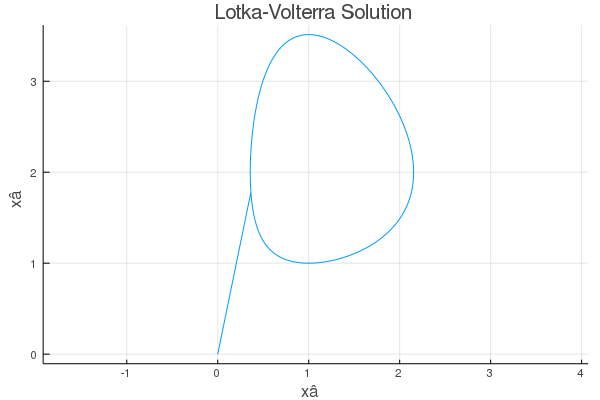

In [15]:
plot(sol.q[1,:], sol.q[2,:], legend=:none, xlab="x₁", ylab="x₂", title="Lotka-Volterra Solution", aspectratio=1, fmt=:png)

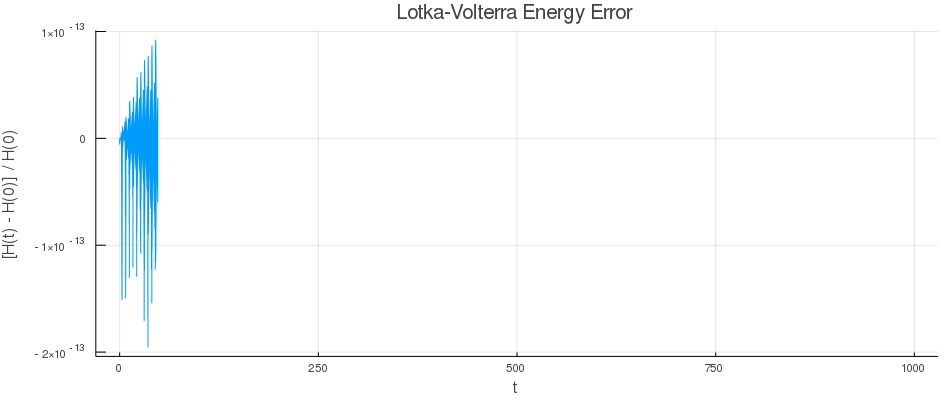

In [16]:
plot(sol.t, ΔH, legend=:none, xlab="t", ylab="[H(t) - H(0)] / H(0)", title="Lotka-Volterra Energy Error", size=(950, 400), fmt=:png)

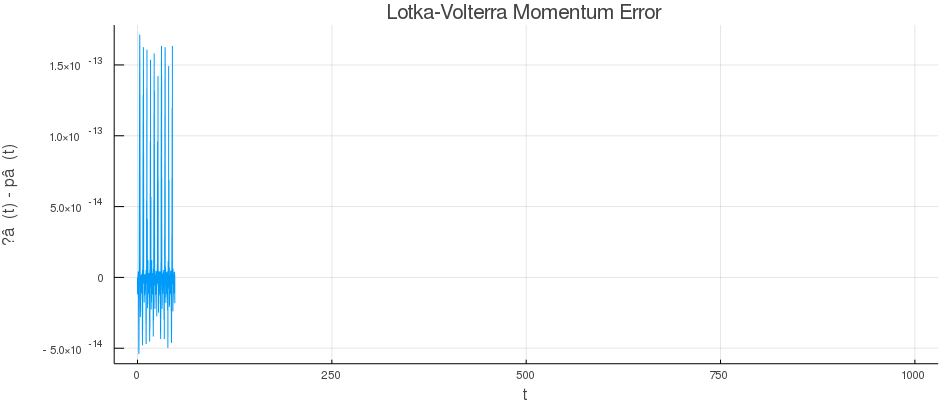

In [17]:
plot(sol.t, Δϑ₁, legend=:none, xlab="t", ylab="ϑ₁(t) - p₁(t)", title="Lotka-Volterra Momentum Error", size=(950, 400), fmt=:png)

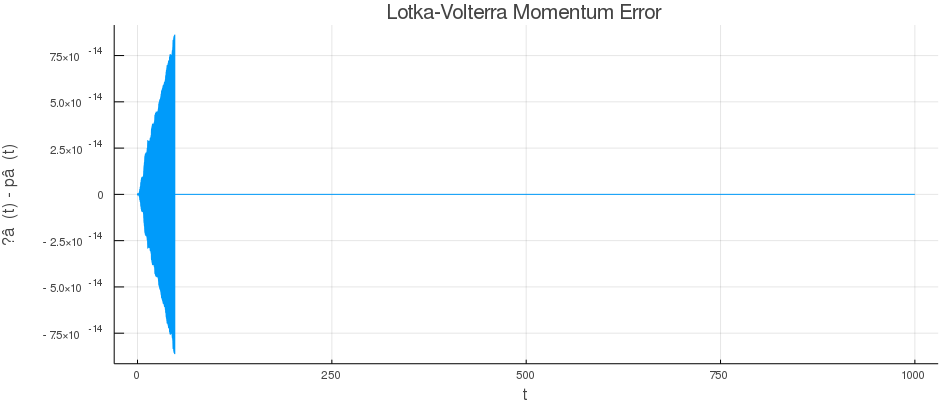

In [18]:
plot(sol.t, Δϑ₂, legend=:none, xlab="t", ylab="ϑ₂(t) - p₂(t)", title="Lotka-Volterra Momentum Error", size=(950, 400), fmt=:png)